## Семинар 13

# Тема: Метод K ближайших соседей

**Описание метода:**

Метод ближайших соседей (k Nearest Neighbors, или kNN) — метрический метод классификации, также иногда используемый в задачах регрессии. 

Cуть метода: для нового объекта посмотреть метки классов k-ближайших соседей, какая метка преобладает, такую и назначить новому объекту. 
    
Необходимо последовательно выполнить следующие операции:
 - Вычислить расстояние от рассматриваемого объекта до каждого из обучающих объектов датасета
 - Отобрать $k$ объектов, расстояние до которых минимально
 - Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди $k$ ближайших соседей (в задаче регрессии значение целевой переменной рассматриваемого объекта назначается, как усреднённое по значениям целевой переменной $k$ ближайших соседей)
 
Свойство такого подхода  – его ленивость. Это значит, что вычисления начинаются только в момент классификации 
нового наблюдения, а заранее, никакая модель не строится. При классификации объекта, который находится среди обучающего датасета, одним из его соседей будет он сам.

Метод kNN простой и понятный алгоритм, применимость которого ограничена вычислительными возможностями при большой размерности данных. 

Качество классификации методом ближайших соседей зависит от нескольких параметров:
 - число соседей
 - метрика расстояния между объектами (часто используются метрика Хэмминга, евклидово расстояние, косинусное расстояние и расстояние Минковского). 
 - веса соседей (чем дальше сосед,тем с меньшим коэффициентом учитывается его "голос")
При использовании большинства метрик значения признаков надо масштабировать. 

**Классы `KNeighborsClassifier` и `KNeighborsRegressor` в `Scikit-learn`**

Основные параметры классов `sklearn.neighbors.KNeighborsClassifier` и `sklearn.neighbors.KNeighborsRegressor`:
 - weights: "uniform" (все веса равны), "distance" (вес обратно пропорционален расстоянию до тестового примера) или другая определенная пользователем функция
 - algorithm (опционально): "brute", "ball_tree", "KD_tree", или "auto". В первом случае ближайшие соседи для каждого тестового примера считаются перебором обучающей выборки. Во втором и третьем - расстояние между примерами хранятся в дереве, что ускоряет нахождение ближайших соседей. В случае указания параметра "auto" подходящий способ нахождения соседей будет выбран автоматически на основе обучающей выборки.
 - leaf_size (опционально): порог переключения на полный перебор в случае выбора BallTree или KDTree для нахождения соседей
 - metric: "minkowski", "manhattan", "euclidean", "chebyshev" и другие

 Загружаем библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

Сгенерируем данные и значения целевой переменной для задачи классификации:

In [2]:
X, y = make_classification(n_samples=1000, 
                           n_features=2, 
                           n_informative=2, 
                           n_redundant=0, 
                           n_classes=3, 
                           n_clusters_per_class = 1, 
                           class_sep=2.5,
                           random_state=1)

Выведем их в виде датафрейма, дав названия колонкам:

In [3]:
df = pd.DataFrame(data =X, columns = ['x'+str(i) for i in range(1,3)])
df['y'] = y
df.head()

,x1,x2,y
0,2.855627,2.248654,0
1,-3.154994,-2.549953,2
2,-3.585510,-2.532976,0
3,-3.834106,-3.211829,2
4,-3.273243,-2.738212,2


Визуализируем данные на диаграмме рассеивания, подкрасив классы разными цветами:

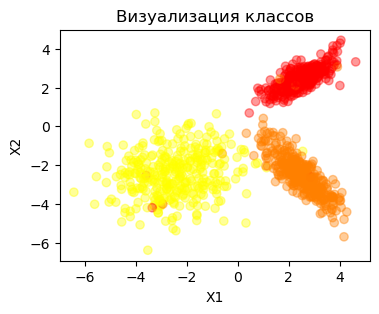

In [4]:
plt.figure(figsize = (4,3))
plt.scatter(X[:, 0], X[:, 1],  c=y, cmap='autumn', alpha = 0.4)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Визуализация классов")
plt.show()

Разделим данные на обучающую и тестовую части:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Масштабируем их:

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Обучим модель k-ближайших соседей для задачи классификации из библиотеки sklearn с числом соседей равным трём, а остальными параметрами по умолчанию:

In [7]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

Сделаем прогноз на тестовой выборке:

In [8]:
y_test_pred = model.predict(X_test_scaled)

Вычислим метрики качества:

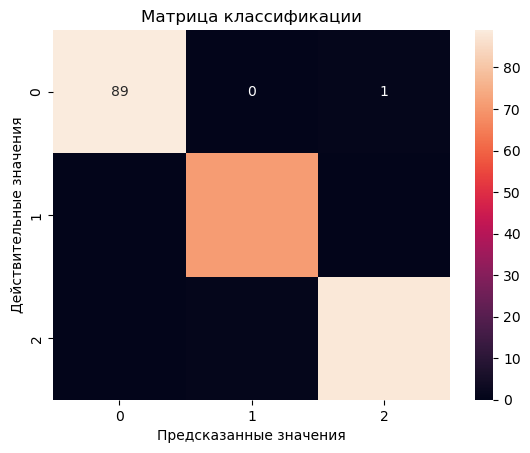

In [9]:
plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [10]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        90
           1       0.99      1.00      0.99        71
           2       0.99      0.99      0.99        89

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



Визуализируем области разделения на классы:

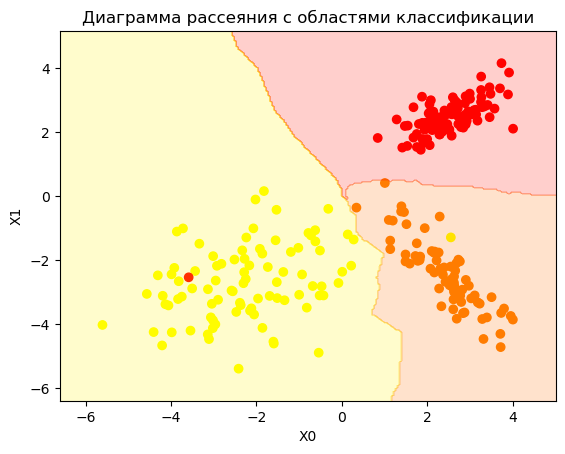

In [11]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='autumn')
X0 = np.linspace(X_test[:, 0].min()-1,X_test[:, 0].max()+1, X_test.shape[0])
X1 = np.linspace(X_test[:, 1].min()-1,X_test[:, 1].max()+1, X_test.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)
Z_grid = model.predict(scaler.transform(np.array([X0_grid.ravel(), X1_grid.ravel()]).T)).reshape(X0_grid.shape)
plt.contourf(X0_grid, X1_grid, Z_grid, cmap='autumn', alpha=0.2)
#plt.pcolormesh(X0_grid, X1_grid, Z_grid, shading='gouraud', cmap='autumn', alpha=0.2)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

### **Задания для самостоятельного выполнения:**

## Задача классификации

### 1. Загрузите встроенный датасет ирисы Фишера _iris_. Возьмите в качестве _X_ только только первый и третий столбцы признаков, а целевую переменную обозначьте за _y_. Выведите признаки вместе с целевой переменной в виде датафрейма с соответствующими названиями колонок. Выведите размеры полученного датафрейма. Убедитесь, что целевая переменная содержит три значения и определите сколько объектов в каждом классе.
Указание: Для загрузки датасета напишите iris = load_iris(). Для определения количества объектов в каждом классе используйте метод _.value_counts()_ библиотеки _pandas_.

In [12]:
iris = load_iris()

In [13]:
X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
X = X[:,0:3:2] # X только только первый и третий столбцы признаков
y = iris.target #целевую переменную обозначьте за y
X, y

(array([[5.1, 1.4],
        [4.9, 1.4],
        [4.7, 1.3],
        [4.6, 1.5],
        [5. , 1.4],
        [5.4, 1.7],
        [4.6, 1.4],
        [5. , 1.5],
        [4.4, 1.4],
        [4.9, 1.5],
        [5.4, 1.5],
        [4.8, 1.6],
        [4.8, 1.4],
        [4.3, 1.1],
        [5.8, 1.2],
        [5.7, 1.5],
        [5.4, 1.3],
        [5.1, 1.4],
        [5.7, 1.7],
        [5.1, 1.5],
        [5.4, 1.7],
        [5.1, 1.5],
        [4.6, 1. ],
        [5.1, 1.7],
        [4.8, 1.9],
        [5. , 1.6],
        [5. , 1.6],
        [5.2, 1.5],
        [5.2, 1.4],
        [4.7, 1.6],
        [4.8, 1.6],
        [5.4, 1.5],
        [5.2, 1.5],
        [5.5, 1.4],
        [4.9, 1.5],
        [5. , 1.2],
        [5.5, 1.3],
        [4.9, 1.4],
        [4.4, 1.3],
        [5.1, 1.5],
        [5. , 1.3],
        [4.5, 1.3],
        [4.4, 1.3],
        [5. , 1.6],
        [5.1, 1.9],
        [4.8, 1.4],
        [5.1, 1.6],
        [4.6, 1.4],
        [5.3, 1.5],
        [5. , 1.4],


In [15]:
df = pd.DataFrame(X, columns=iris.feature_names[0:3:2])
df["target"] = y
df

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [16]:
df.shape

(150, 3)

In [17]:
pd.Series(y).value_counts()

0    50
1    50
2    50
Name: count, dtype: int64

### 2. Разделите данные на обучающую и тестовую части в соотношении 4:1, зафиксировав random_state=42. Выведите получившиеся размеры обучающей и тестовой выборок. Визуализируйте тестовые данные на диаграмме рассеивания.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [62]:
(X_train.shape, X_test.shape)

((120, 2), (30, 2))

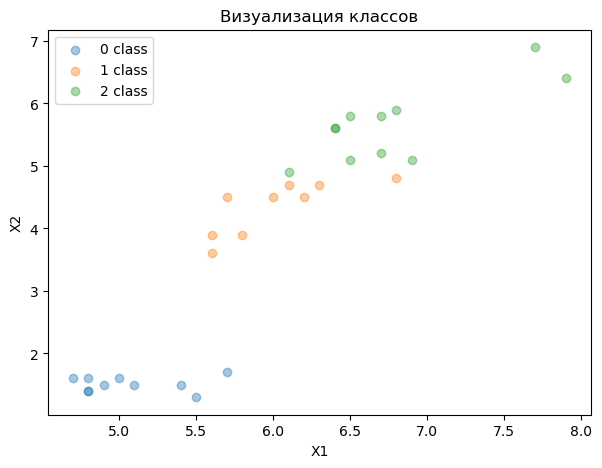

In [63]:
plt.figure(figsize = (7,5))
plt.scatter(X_test[:,0][y_test == 0], X_test[:,1][y_test == 0],  alpha = 0.4, label="0 class")
plt.scatter(X_test[:,0][y_test == 1], X_test[:,1][y_test == 1],  alpha = 0.4, label="1 class")
plt.scatter(X_test[:,0][y_test == 2], X_test[:,1][y_test == 2],  alpha = 0.4, label="2 class")
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Визуализация классов")
plt.show()

### 3. Масштабируйте обучающие и тестовые данные методом стандартной нормализации. Визуализируйте масштабированные тестовые данные на диаграмме рассеивания.

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

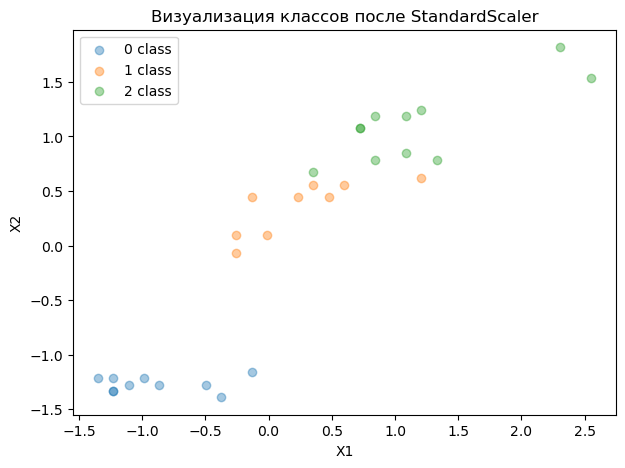

In [65]:
plt.figure(figsize = (7,5))
plt.scatter(X_test_scaled[:,0][y_test == 0], X_test_scaled[:,1][y_test == 0],  alpha = 0.4, label="0 class")
plt.scatter(X_test_scaled[:,0][y_test == 1], X_test_scaled[:,1][y_test == 1],  alpha = 0.4, label="1 class")
plt.scatter(X_test_scaled[:,0][y_test == 2], X_test_scaled[:,1][y_test == 2],  alpha = 0.4, label="2 class")
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Визуализация классов после StandardScaler")
plt.show()

### 4. Обучите модель k-ближайших соседей для задачи классификации из библиотеки sklearn с числом соседей равным трём, а остальными параметрами по умолчанию. Для пятого масштабированного тестового наблюдения выведите расстояния до трёх ближайших соседей. Выведите индексы и координаты трёх ближайших соседей. 
Указание: Используйте класс [KNeighborsClassifier](https://scikit-learn.ru/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.kneighbors). Установите параметр - число соседей: n_neighbors=3. Для выведения расстояний и индексов используйте метод kneighbors.

In [66]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [76]:
distances, indices  = model.kneighbors([X_test_scaled[4]])
distances #выведите расстояния до трёх ближайших соседей

array([[0.1346952 , 0.1346952 , 0.16731592]])

In [77]:
indices #Выведите индексы трёх ближайших соседей.

array([[ 12, 105,  54]])

In [92]:
# Получаем координаты ближайших соседей
neighbors = X_train_scaled[indices.flatten()]
neighbors

array([[1.08589829, 0.55777524],
       [1.32969211, 0.67238659],
       [1.08589829, 0.72969227]])

### 5. Визуализируйте на диаграмме рассеивания масштабированных обучающих данных пятый масштабированный тестовый объект, а также отметьте серыми звёздочками трёх его ближайших соседей. По графику определите к какому классу должен быть отнесён пятый тестовый объект. Выведите метку класса пятого тестового объекта, используя метод predict.

In [84]:
X_test_scaled[4]

array([1.2077952 , 0.61508092])

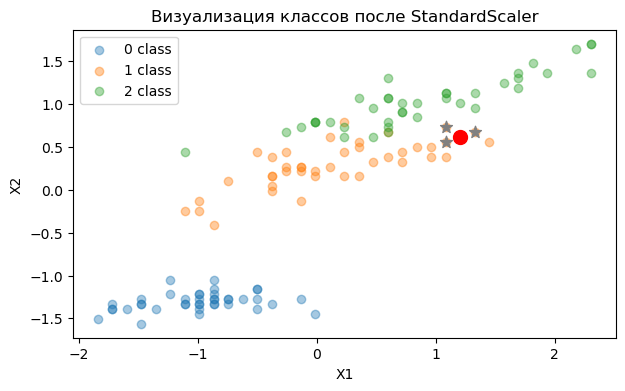

In [94]:
plt.figure(figsize = (7,4))
plt.scatter(X_train_scaled[:,0][y_train == 0], X_train_scaled[:,1][y_train == 0],  alpha = 0.4, label="0 class")
plt.scatter(X_train_scaled[:,0][y_train == 1], X_train_scaled[:,1][y_train == 1],  alpha = 0.4, label="1 class")
plt.scatter(X_train_scaled[:,0][y_train == 2], X_train_scaled[:,1][y_train == 2],  alpha = 0.4, label="2 class")

plt.scatter(X_test_scaled[4][0], X_test_scaled[4][1], color = "red", s = 100)

for i in neighbors:
    plt.scatter(i[0], i[1], color = "gray", s = 80, marker = "*")
    
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Визуализация классов после StandardScaler")
plt.show()

### 6. Сделайте предсказания на всех масштабированных тестовых данных и выведите матрицу ошибок и отчёт о классификации. Оцените качество построенной модели.

In [96]:
y_test_pred = model.predict(X_test_scaled)

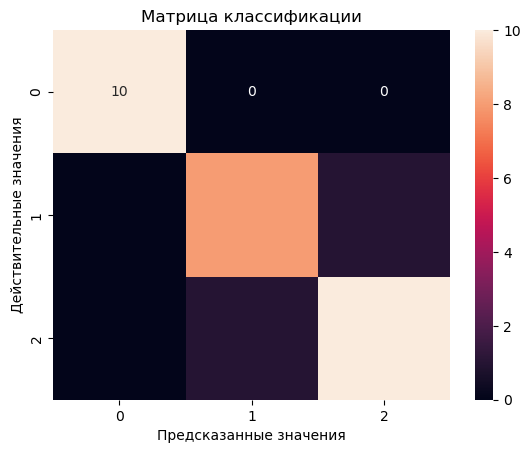

In [97]:
plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [98]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### 7. Визуализируйте области классификации тестовых данных

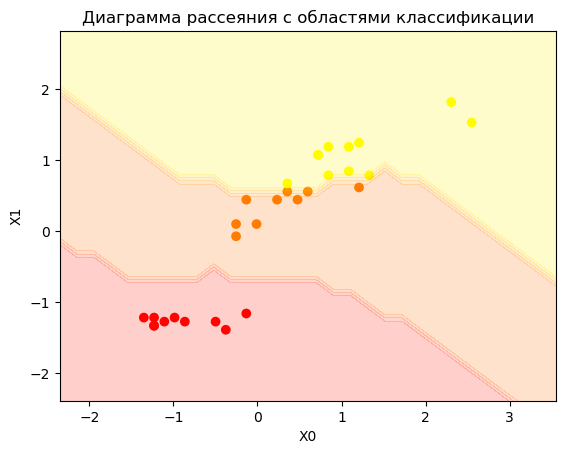

In [102]:
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap='autumn')
X0 = np.linspace(X_test_scaled[:, 0].min()-1,X_test_scaled[:, 0].max()+1, X_test_scaled.shape[0])
X1 = np.linspace(X_test_scaled[:, 1].min()-1,X_test_scaled[:, 1].max()+1, X_test_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)
Z_grid = model.predict((np.array([X0_grid.ravel(), X1_grid.ravel()]).T)).reshape(X0_grid.shape)
plt.contourf(X0_grid, X1_grid, Z_grid, cmap='autumn', alpha=0.2)
#plt.pcolormesh(X0_grid, X1_grid, Z_grid, shading='gouraud', cmap='autumn', alpha=0.2)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

### 8. Постройте график зависимости значения метрики $F_1$-мера от числа соседей. Определите по графику наилучшее число соседей.

In [103]:
f1_score(y_test, y_test_pred, average='macro')

0.9326599326599326

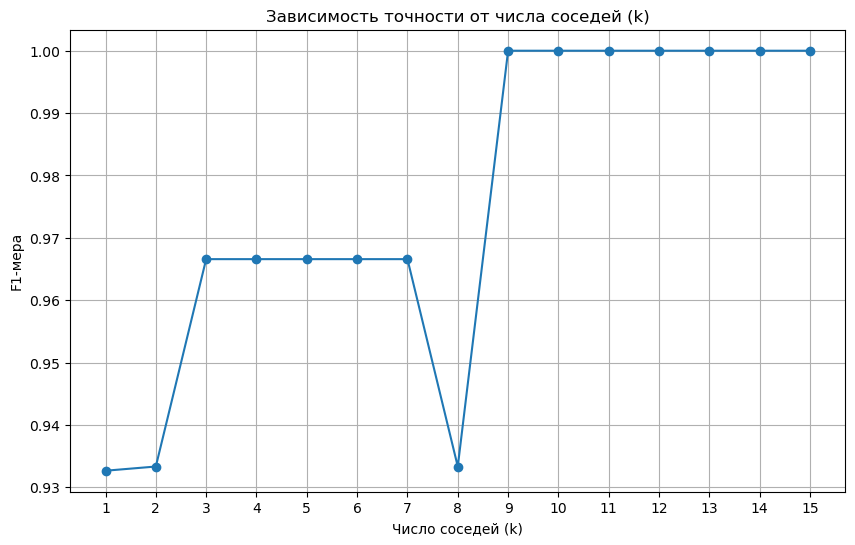

In [112]:
f1_scores = []

k_values = range(1, 16)
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    f1 = f1_score(y_test, y_pred, average='macro')
    f1_scores.append(f1)
    
plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_scores, marker='o')
plt.title('Зависимость точности от числа соседей (k)')
plt.xlabel('Число соседей (k)')
plt.ylabel('F1-мера')
plt.xticks(k_values)
plt.grid()
plt.show()

### 9. Используя конвейер, обучите на обучающих данных модель k-ближайших соседей для задачи классификации из библиотеки sklearn с числом соседей, найденным в предыдущем задании. Сделайте предсказание на тестовых данных и вычислите метрики коэффициент детерминации и MSE. Оцените, улучшилось ли качество модели?

In [121]:
pipe = Pipeline(steps = [("st", StandardScaler()), ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=9))])

In [122]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('st', StandardScaler()),
                ('polinom', KNeighborsClassifier(n_neighbors=9))])

In [123]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [125]:
r2 = r2_score(y_test, y_pred)
r2

1.0

In [124]:
mse = mean_squared_error(y_test, y_pred)
mse

0.0

## Задача регрессии

### 1. Сгенерируйте данные и значения целевой переменной для задачи регрессии с 1 признаком и 100 наблюдениями, как шум параболы $y = x^2$ на промежутке от -1 до 5. Визуализируйте диаграмму рассеивания сгенерироавнных данных на одном графике с истинной кривой.

    Указание:
    def linear_expression(x):
        return x**2
    np.random.seed(42)    
    n_sumpels = 100
    X = np.linspace(-1, 5, n_sumpels).reshape(-1, 1)
    y = linear_expression(X.ravel()) + np.random.randn(n_sumpels)     

In [131]:
def linear_expression(x):
    return x**2

In [137]:
np.random.seed(42)

n_samples = 100
X = np.linspace(-1, 5, n_samples).reshape(-1, 1)
y = linear_expression(X.ravel()) + np.random.randn(n_samples) * 0.5  

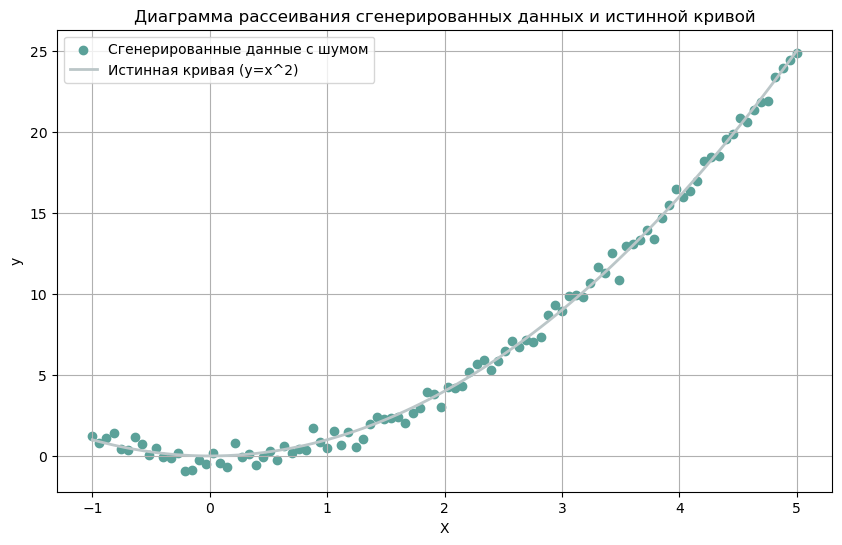

In [136]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Сгенерированные данные с шумом', color="#5BA199")
plt.plot(X, linear_expression(X), label='Истинная кривая (y=x^2)', linewidth=2, color="#BBC6C8")
plt.title('Диаграмма рассеивания сгенерированных данных и истинной кривой')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

### 2. Разделите данные на обучающую и тестовую части в соотношении 4:1, зафиксировав random_state=42. Выведите получившиеся размеры обучающей и тестовой выборок. Визуализируйте обучающие и тестовые данные на диаграмме рассеивания, подкрасив их разными цветами.

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [139]:
(X_train.shape, X_test.shape)

((80, 1), (20, 1))

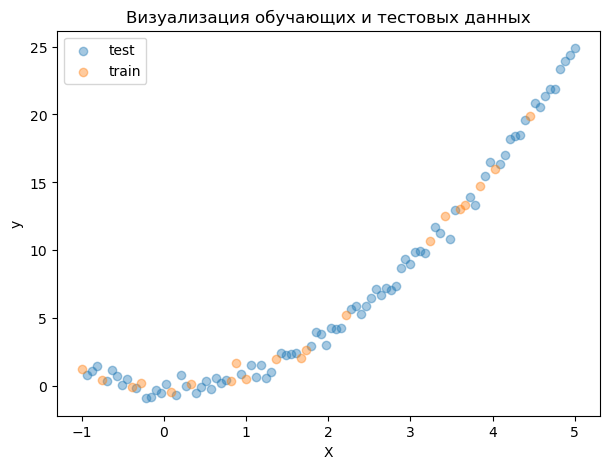

In [184]:
plt.figure(figsize = (7,5))

plt.scatter(X_train, y_train, alpha = 0.4, label="test")
plt.scatter(X_test, y_test, alpha = 0.4, label="train")

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title("Визуализация обучающих и тестовых данных")
plt.show()

### 3. Масштабируйте данные методом стандартной нормализации. Обучите на масштабированных обучающих данных модель k-ближайших соседей для задачи регрессии из библиотеки sklearn с числом соседей равным трём, а остальными параметрами по умолчанию. Для самого первого масштабированного тестового наблюдения выведите индексы его трёх ближайших соседей. Выведите значения целевой переменной для объектов с полученными индексами и найдите значение целевой переменной первого тестового объекта, как их среднее. Выведите значение целевой переменной первого тестового объекта, используя метод predict. Убедитесь, что полученные значения будут примерно равны.

Указание: Используйте класс [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html). Установите параметр - число соседей: n_neighbors=3. Для выведения расстояний и индексов используйте метод kneighbors.

In [186]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [187]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

In [188]:
distances, indices  = model.kneighbors([X_test_scaled[0]])
distances, indices

(array([[0.03463937, 0.03463937, 0.06927874]]), array([[73, 61, 26]]))

In [189]:
neighbors = y_train[indices.flatten()]
neighbors

array([16.49744105, 16.33129039, 15.45954802])

In [190]:
np.mean(neighbors)

16.09609315450706

In [191]:
model.predict(np.array([X_test_scaled[0]]))

array([16.09609315])

### 4. Сделайте предсказания на всех масштабированных тестовых данных. Оцените качество работы построенной модели по метрикам: коэффициент детерминации и MSE. 

In [192]:
y_pred = model.predict(X_test_scaled)
y_pred

array([16.09609315,  5.29380999, 10.9255237 ,  3.11350912,  2.5752252 ,
        1.33175922, -0.22042454, 14.25074388,  0.12892724,  1.11345921,
       -0.34355012,  0.49641131, 11.70387739,  1.01952161, 20.34026122,
        0.99806659, 12.58464599, 13.4246276 , -0.62430018,  0.49641131])

In [193]:
r2 = r2_score(y_test, y_pred)
r2

0.9939410933547723

In [194]:
mse = mean_squared_error(y_test, y_pred)
mse

0.2603636838896882

### 5. Визуализируйте на одном графике линию регрессии и диаграмму рассеивания тестовых данных.

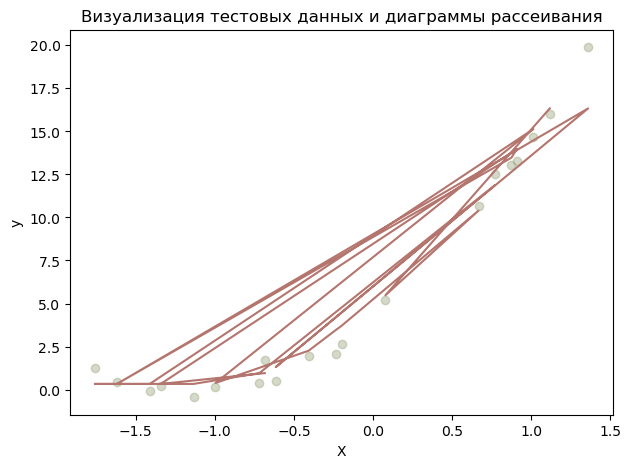

In [209]:
plt.figure(figsize = (7,5))
#X0 = np.linspace(X_test_scaled[:, 0].min()-1,X_test_scaled[:, 0].max()+1, X_test_scaled.shape[0])
#X1 = np.linspace(y_pred.min()-1,y_pred.max()+1, y_pred.shape[0])

#plt.plot(X0, X1, color = "#b4756e")
plt.plot(X_test_scaled, y_pred, color = "#b4756e")
plt.scatter(X_test_scaled, y_test, alpha = 0.4, color = "#98a278")

plt.xlabel('X')
plt.ylabel('y')
plt.title("Визуализация тестовых данных и диаграммы рассеивания")
plt.show()

### 6. Постройте график зависимости значения метрики $MSE$ от числа соседей. Определите по графику наилучшее число соседей.

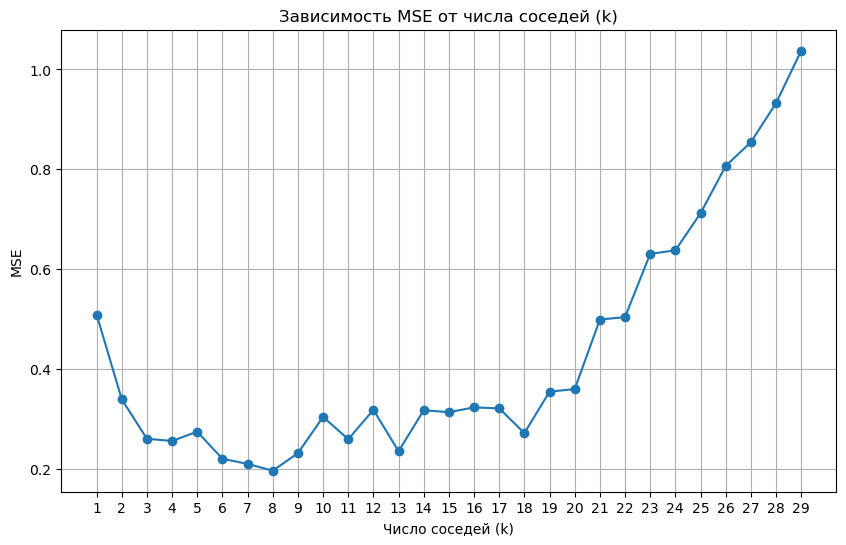

In [208]:
mse_scores = []

k_values = range(1, 30)
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_scores, marker='o')
plt.title('Зависимость MSE от числа соседей (k)')
plt.xlabel('Число соседей (k)')
plt.ylabel('MSE')
plt.xticks(k_values)
plt.grid()
plt.show()

### 7. Обучите на масштабированных обучающих данных модель k-ближайших соседей для задачи регрессии из библиотеки sklearn с числом соседей, найденным в предыдущем задании. Сделайте предсказание на масштабированных тестовых данных и оцените качество построенной модели по метрикам коэффициент детерминации и MSE. Сделайте вывод о том, улучшилось ли качество модели по сравнению с моделью с тремя соседями.

In [210]:
model = KNeighborsRegressor(n_neighbors=20) #n_neighbors = ?
model.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=20)

In [211]:
y_pred = model.predict(X_test_scaled)
y_pred

array([17.19864782,  5.23032939, 10.22550477,  3.19909789,  2.94937415,
        2.16458009,  0.0879872 , 15.32175232,  0.16941745,  0.16941745,
        0.03208012,  0.81607174, 11.78502534,  0.99854105, 19.16897352,
        0.16941745, 12.92010529, 13.53106987,  0.16941745,  0.81607174])

In [212]:
r2 = r2_score(y_test, y_pred)
r2

0.9916260017080618

In [213]:
mse = mean_squared_error(y_test, y_pred)
mse

0.359847934922767

### 8. Используя конвейер, обучите на обучающих данных модель k-ближайших соседей для задачи регрессии из библиотеки sklearn с тем же количеством соседей, что и в предыдущем задании, учтя веса соседей weights="distance". Сделайте предсказание на тестовых данных и вычислите метрики коэффициент детерминации и MSE. Оцените, улучшилось ли качество модели с учётом весов соседей?

In [219]:
pipe = Pipeline(steps = [("st", StandardScaler()), ('KNeighborsRegressor', KNeighborsRegressor(n_neighbors=20, weights="distance"))])

In [220]:
pipe.fit(X_train_scaled, y_train)

Pipeline(steps=[('st', StandardScaler()),
                ('KNeighborsRegressor',
                 KNeighborsRegressor(n_neighbors=20, weights='distance'))])

In [221]:
y_pred = model.predict(X_test_scaled)
y_pred

array([17.19864782,  5.23032939, 10.22550477,  3.19909789,  2.94937415,
        2.16458009,  0.0879872 , 15.32175232,  0.16941745,  0.16941745,
        0.03208012,  0.81607174, 11.78502534,  0.99854105, 19.16897352,
        0.16941745, 12.92010529, 13.53106987,  0.16941745,  0.81607174])

In [222]:
r2 = r2_score(y_test, y_pred)
r2

0.9916260017080618

In [223]:
mse = mean_squared_error(y_test, y_pred)
mse

0.359847934922767